C:\Users\injoo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\injoo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\injoo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


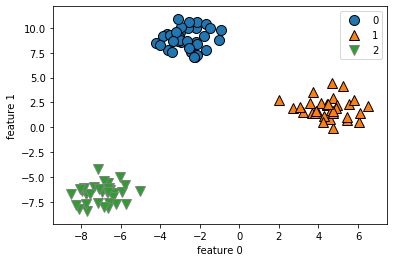

In [2]:
#데이터 생성 및 시각화
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(random_state = 42)

mglearn.discrete_scatter(X[:, 0], X[:,1], y)

plt.legend()
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

In [4]:
#훈련셋 및 테스트셋 분리 및 LogisticRegression 실행
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4)
model = LogisticRegression(C=1, max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# 예측하기
model.predict(X_test)

array([0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 1, 0])

In [6]:
# 평가하기
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 1.0)

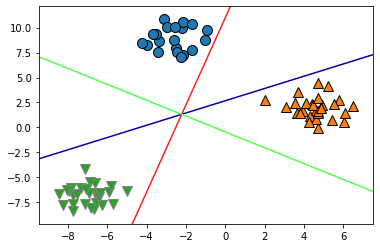

In [11]:
# 실행 결과 시각화
mglearn.discrete_scatter(X_train[:, 0], X_train[:,1], y_train)

xx = np.linspace(-15, 15)

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    yy = -(coef[0]*xx + intercept) / coef[1]
    plt.plot(xx, yy, color)

### 붓꽃 데이터 셋을 이용한 다중 분류

In [16]:
# 데이터 로드
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
# 데이터 분리
# 훈련 데이터를 75%, 테스트 데이터를 25% 선택
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, 2:], 
                                                    iris.target,
                                                    random_state=0)

In [19]:
# LogisticRegression 수행
model = LogisticRegression(C=1)
model.fit(X_train, y_train)


#훈련 스코어와 테스트 스코어 비교
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9732142857142857, 0.9736842105263158)

In [20]:
# 예측
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

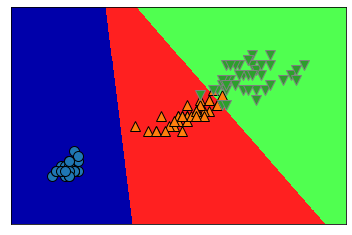

In [23]:
# 다중 분류
# make_blobs() 함수는 n개의 무작위 데이터 클러스트러를 생성
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
mglearn.plots.plot_2d_classification(model, X_train, fill=False)

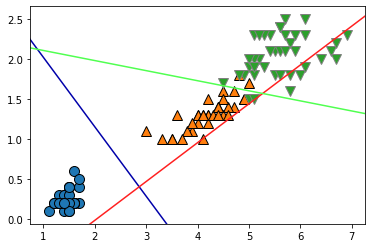

In [26]:
# LinearSVC 비교
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

xx = np.linspace(-15, 15)

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    yy = -(coef[0]*xx + intercept) / coef[1]
    plt.plot(xx, yy, color)

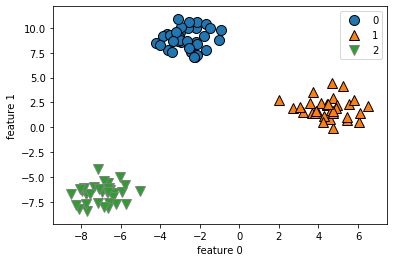

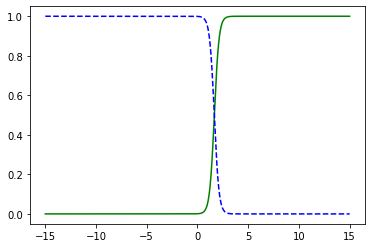

In [28]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import mglearn

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend()
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()
# 결정경계
# 꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률을 계산
iris = load_iris()

X = iris.data[:, 3:]  # 꽃잎의 너비
y = (iris.target == 2).astype(np.int)

model = LogisticRegression().fit(X, y)

xx = np.linspace(-15, 15, 1000).reshape(-1,1)
y_proba = model.predict_proba(xx)
plt.plot(xx, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(xx, y_proba[:,0], 'b--', label='Not Iris virginica')